In [5]:
import numpy as np
from matplotlib import pyplot as plt

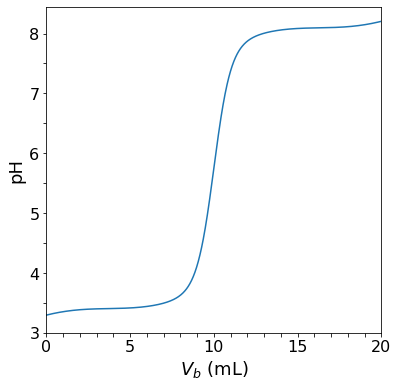

In [6]:
V=np.linspace(0,20,1000)
Ve=10
pente=0.055

steep=2
pH=pente*V+3.2+4/(1+np.exp(steep*(Ve-V)))+0.1*np.sin((V-Ve)/2)
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(V,pH)
ax.set_xlim(0,20)
ax.set_ylim(3)
ax.set_xlabel(r'$V_b$ (mL)',fontsize=18)
ax.set_ylabel('pH',fontsize=18, rotation=90)
plt.xticks(np.linspace(0,20,21),['0','','','','','5','','','','','10','','','','','15','','','','','20'],fontsize=16)
plt.yticks(np.linspace(3,8,11),['3','','4','','5','','6','','7','','8'],fontsize=16)
plt.savefig('titrage_acide')


In [9]:
lambda_Ag=6.19
lambda_Cl=7.63
lambda_Na=5.01
lambda_NO3=7.14
Vtot=220
Veq=12

pas_V_titrante=1
V_titrante=np.linspace(0,20,int(20/pas_V_titrante+1))
sigma=[]
c_AgNO3=0.5
V_NaCl=10
c_NaCl_ini=c_AgNO3*Veq/Vtot
for V in V_titrante:
    c_NO3=c_AgNO3*V/Vtot
    if V<Veq:
        n_Cl=c_AgNO3*(Veq-V)
        c_Cl=n_Cl/Vtot
        sigma.append(lambda_Na*c_NaCl_ini+lambda_Cl*c_Cl+lambda_NO3*c_NO3)
    else:
        n_Ag=c_AgNO3*(V-Veq)
        c_Ag=n_Ag/Vtot
        sigma.append(lambda_Na*c_NaCl_ini+lambda_Ag*c_Ag+lambda_NO3*c_NO3)


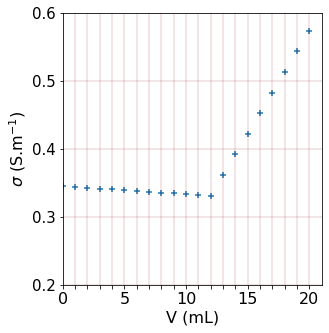

In [11]:
fig,ax=plt.subplots(figsize=(5,5))
plt.subplots_adjust(left=0.18)
ax.scatter(V_titrante,np.array(sigma),marker='+',s=40)
ax.set_xlim(0)
ax.set_xlabel('V (mL)',fontsize=16)
ax.set_ylabel(r'$\sigma$ (S.m$^{-1}$)',fontsize=16)
plt.grid(linewidth=.2,color='darkred')
plt.xticks(np.linspace(0,20,21),['0','','','','','5','','','','','10','','','','','15','','','','','20'],fontsize=16)
plt.yticks(np.linspace(0.2,0.6,5),fontsize=15)
plt.savefig('titrage_conduct_AgCl')